In [34]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import correlate
import librosa
import matplotlib.pyplot as plt

In [35]:
# taken from https://stackoverflow.com/questions/38453249/is-there-a-matlabs-buffer-equivalent-in-numpy 
def buffer(X = np.array([]), n = 1, p = 0):
    #buffers data vector X into length n column vectors with overlap p
    #excess data at the end of X is discarded
    n = int(n) #length of each data vector
    p = int(p) #overlap of data vectors, 0 <= p < n-1
    L = len(X) #length of data to be buffered
    m = int(np.floor((L-n)/(n-p)) + 1) #number of sample vectors (no padding)
    data = np.zeros([n,m]) #initialize data matrix
    for startIndex,column in zip(range(0,L-n,n-p),range(0,m)):
        data[:,column] = X[startIndex:startIndex + n] #fill in by column
    return data

In [36]:
y, s = librosa.load('H_MKB.wav', sr=8000)
print(np.shape(y))
Fs = 8000
frames = buffer(y, 20*Fs/1000, (20*Fs/1000)-1);
print(np.shape(frames))
E = np.sum(np.multiply(frames, frames), axis=0)
print(np.shape(E))
threshold = np.mean(E)
print(threshold)

(94274,)
(160, 94115)
(94115,)
0.70088983292132


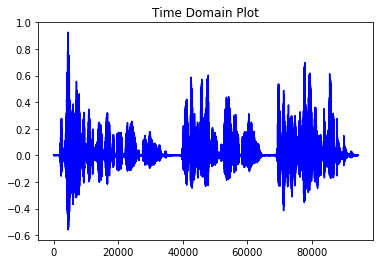

In [37]:
plt.title('Time Domain Plot')
plt.plot(y, 'b')
plt.show()

In [38]:
sec=np.shape(frames)[1]
vuv = np.zeros((1, sec))
vuv = np.where(E<threshold, 0, 10)
np.shape(vuv)

(94115,)

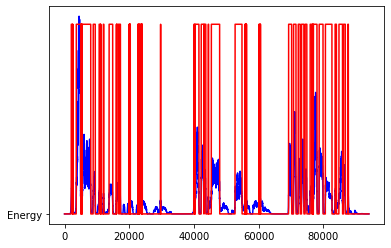

In [39]:
plt.plot('Energy')
plt.plot(E, 'b')
plt.plot(vuv, 'r')

(94274,) (94274,)
8.762604312819931 2637.02045530296
3.0337269412955323 912.9705866434913
68
117.6470588235294 Hz


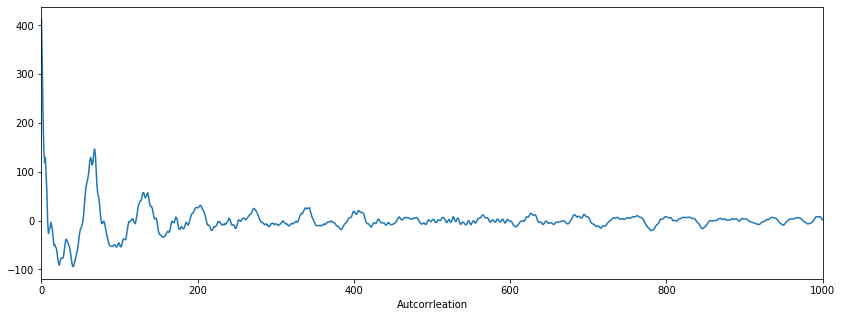

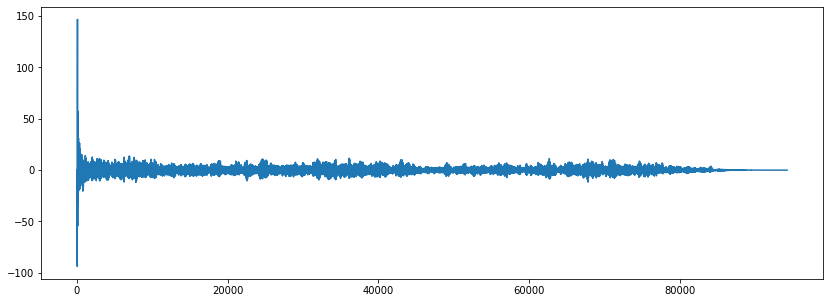

In [64]:
r = correlate(y,y,mode="full")[len(y)-1:]
print(y.shape, r.shape)
plt.figure(figsize=(14, 5))
plt.plot(r)
plt.xlabel("Autcorrleation")
plt.xlim(0,1000)

midi_hi = 100.0
midi_lo = 1.2
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = s/f_hi
t_hi = s/f_lo
print(f_lo, f_hi)
print(t_lo, t_hi)
r[:20] = 00
plt.figure(figsize=(14, 5))
plt.plot(r)
t_max = r.argmax()
print(t_max)
print(float(s)/t_max,"Hz")

(1, 94275)
(94274,)


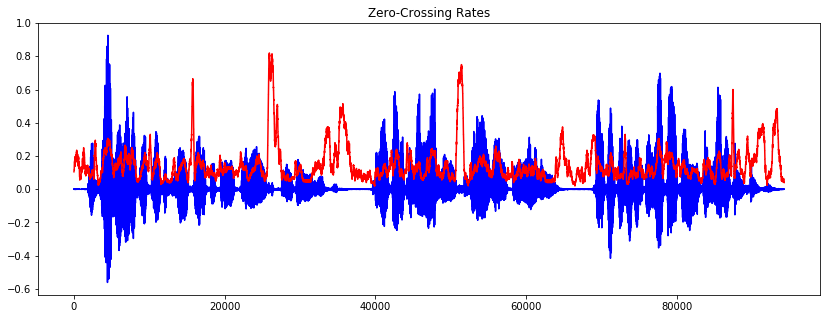

In [84]:
zcrs = librosa.feature.zero_crossing_rate(y+0.0001,frame_length=200,hop_length=1)
print(zcrs.shape)
print(y.shape)
plt.figure(figsize=(14, 5))
plt.title('Zero-Crossing Rates')
plt.plot(y[1:],c='b')
plt.plot(zcrs[0],c='r')
